In [1]:
import motion
import xarray

xarray.set_options(display_style="html")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="whitegrid")
sns.set_context()
from pathlib import Path

%load_ext lab_black

In [2]:
data_path = Path("../tests/data/markers_analogs.c3d")

In [3]:
data = motion.read_analogs_c3d(data_path)
data

<xarray.DataArray (channel: 38, time_frame: 11600)>
array([[-0.02205157, -0.01991534, -0.01991534, ..., -0.02311969,
        -0.02311969,  0.        ],
       [-0.01039797, -0.01024538, -0.01024538, ..., -0.01207644,
        -0.01207644,  0.        ],
       [-0.01544412, -0.01437601, -0.01437601, ..., -0.01399454,
        -0.01399454,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
  * channel     (channel) <U14 'Voltage.1' 'Voltage.2' ... 'EMG8' 'EMG9'
  * time_frame  (time_frame) float64 0.0 0.0005 0.001 0.0015 ... 5.798 5.799 5.8
Attributes:
    first_frame:  0
    last_frame:   11580
    rate:         2000.0
    unit:         V

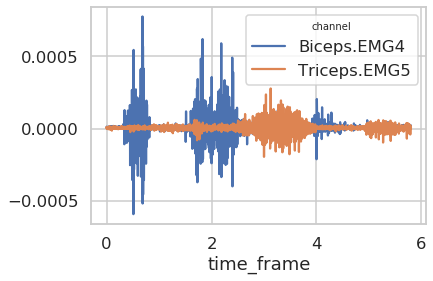

In [4]:
muscles = ["Biceps.EMG4", "Triceps.EMG5"]
emg = data.sel(channel=muscles)
emg.plot.line(x="time_frame")
plt.show()

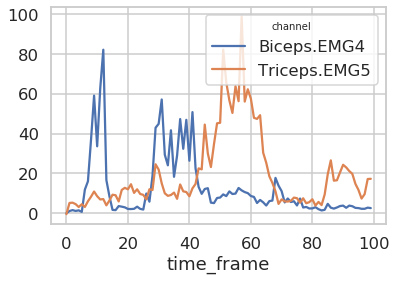

In [5]:
emg_processed = (
    emg.meca.band_pass(freq=emg.rate, order=4, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(freq=emg.rate, order=4, cutoff=10)
    .meca.normalize()
    .meca.time_normalize(norm_time_frame=True)
)

emg_processed.plot.line(x="time_frame")
plt.show()

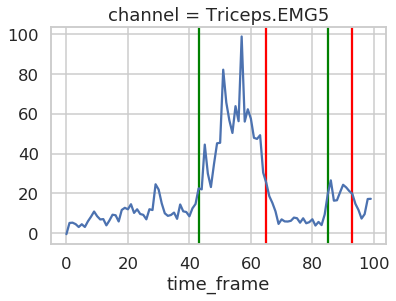

In [6]:
x = emg_processed.sel(channel="Triceps.EMG5")

idx = x.meca.detect_onset(threshold=x.mean(), n_above=5, n_below=5)

for i in idx:
    plt.axvline(x=i[0], c="green")
    plt.axvline(x=i[1], c="red")

x.plot.line(x="time_frame")
plt.show()